<a href="https://colab.research.google.com/github/thakurnimesh107/Telecom-Churn-Analysis/blob/main/Telecom_Churn_Analysis_solution_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>



# Importing Modules and Loading Data



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#inserting the data file
path = '/content/drive/MyDrive/Telecom  Churn Prediction- Nimesh Thakur/Telecom Churn.csv'
df = pd.read_csv(path)

# Exploring the Data

In [ ]:
#looking the first five rows to get the glimpse of data
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
#looking the last five rows to get the glimpse of data
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
#getting the shape of the data
df.shape

(3333, 20)

In [ ]:
#getting all overall info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
#looking for the description of the data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,3333,51,WV,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account length,3333.0,NaN,NaN,NaN,101.064806,39.822106,1.0,74.0,101.0,127.0,243.0
Area code,3333.0,NaN,NaN,NaN,437.182418,42.37129,408.0,408.0,415.0,510.0,510.0
International plan,3333,2,No,3010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Voice mail plan,3333,2,No,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number vmail messages,3333.0,NaN,NaN,NaN,8.09901,13.688365,0.0,0.0,0.0,20.0,51.0
Total day minutes,3333.0,NaN,NaN,NaN,179.775098,54.467389,0.0,143.7,179.4,216.4,350.8
Total day calls,3333.0,NaN,NaN,NaN,100.435644,20.069084,0.0,87.0,101.0,114.0,165.0
Total day charge,3333.0,NaN,NaN,NaN,30.562307,9.259435,0.0,24.43,30.5,36.79,59.64
Total eve minutes,3333.0,NaN,NaN,NaN,200.980348,50.713844,0.0,166.6,201.4,235.3,363.7


# **Breakdown of the features of dataset**:

###**State**:51 Uniques state names.

###**Account Length**: Length of the Accounts.

###**Area Code**: Code number of area of tthe states.

###**International Plan**: It has two input 'Yes' or 'No'. 'Yes' indicates the subscription of the plan and 'No' indicates the non subscription the plan.

###**Voice Mail Plan**: It has two input 'Yes' or 'No'. 'Yes' indicates the presence of voice plan and 'No' indicates the absence of voice plan.

###**Number vmail messages**: The number of voice messages ranging from 0 to 50.

###**Total day minutes**: Total minutes spent in morning.

###**Total day calls**: Total number of calls made in morning.

###**Total day charge**: Total charge that customer consumed in morning.

###**Total eve minutes**: Total number of minutes spend in evening.

###**Total eve calls**: Total number of calls made in evening.

###**Total eve charge**: Total charge that customer consumed in evening.

###**Total night minutes**: Total number of minutes spend in night.

###**Total night calls**: Total number of calls made in night.

###**Total night charge**: Total charge that customer consumed in night.

###**Customer service calls**: Number of service calls made by the customer.

###**Churn**: customer churn, if 'True' means churned customer, if 'False' means retained customer



In [ ]:
#getting all the columns
list(df.columns)

['State',
 'Account length',
 'Area code',
 'International plan',
 'Voice mail plan',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Churn']

In [ ]:
#getting the unique values in data set
df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

# **So now let us explore the dataset a bit and see the insights on the call duration, number of calls and charges**

**As these data sets are numerical data type, so for analysing with the 'churn'  **

In [ ]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total day calls'].mean())


Churn
False    100.283158
True     101.335404
Name: Total day calls, dtype: float64


In [ ]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total day minutes'].mean())


Churn
False    175.175754
True     206.914079
Name: Total day minutes, dtype: float64


In [ ]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total day charge'].mean())


Churn
False    29.780421
True     35.175921
Name: Total day charge, dtype: float64


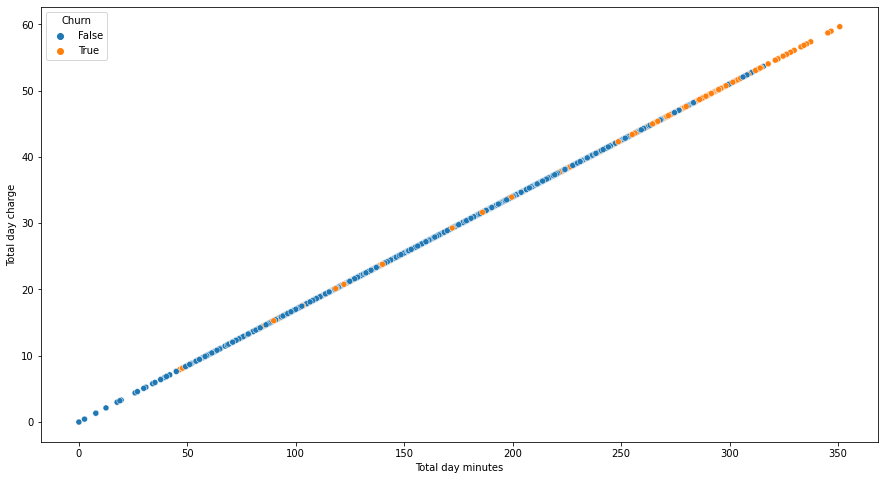

In [ ]:
#show the relation using scatter plot
sns.scatterplot(x="Total day minutes", y="Total day charge", hue="Churn", data=df)
plt.rcParams['figure.figsize']=(15,8)
plt.show()

In [ ]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total eve calls'].mean())


Churn
False    100.038596
True     100.561077
Name: Total eve calls, dtype: float64


In [ ]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total eve minutes'].mean())


Churn
False    199.043298
True     212.410145
Name: Total eve minutes, dtype: float64


In [ ]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total eve charge'].mean())


Churn
False    16.918909
True     18.054969
Name: Total eve charge, dtype: float64


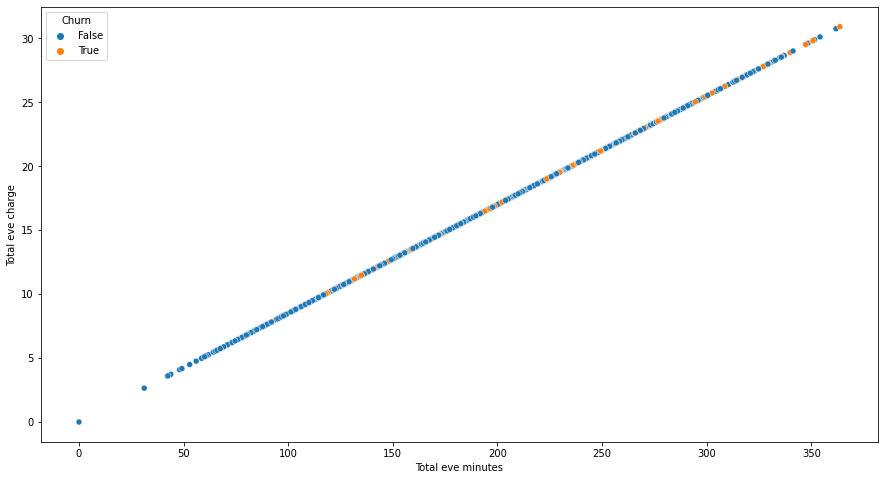

In [ ]:
#show the relation using scatter plot
sns.scatterplot(x="Total eve minutes", y="Total eve charge", hue="Churn", data=df)

In [ ]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total night calls'].mean())


Churn
False    100.058246
True     100.399586
Name: Total night calls, dtype: float64


In [ ]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total night charge'].mean())



Churn
False    9.006074
True     9.235528
Name: Total night charge, dtype: float64


In [ ]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total night minutes'].mean())



Churn
False    200.133193
True     205.231677
Name: Total night minutes, dtype: float64


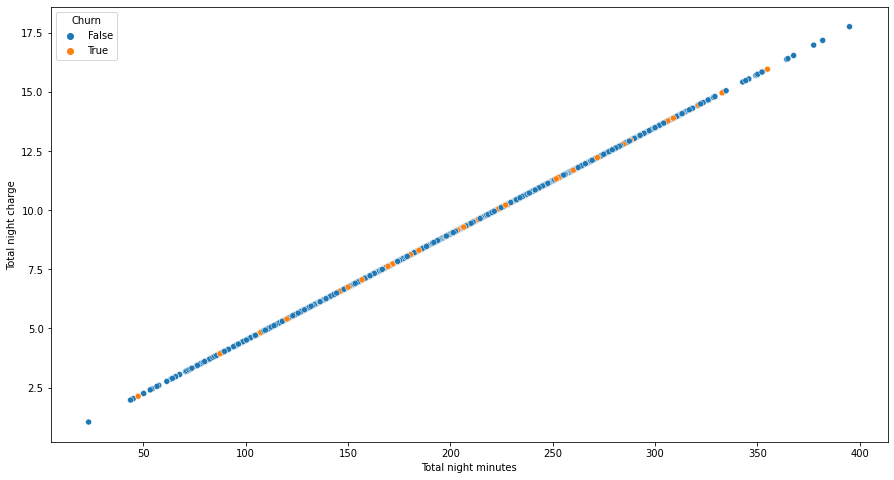

In [ ]:
#show the relation using scatter plot
sns.scatterplot(x="Total night minutes", y="Total night charge", hue="Churn", data=df)


In [ ]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total intl minutes'].mean())


Churn
False    10.158877
True     10.700000
Name: Total intl minutes, dtype: float64


In [ ]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total intl minutes'].mean())


Churn
False    10.158877
True     10.700000
Name: Total intl minutes, dtype: float64


In [ ]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total intl minutes'].mean())


Churn
False    10.158877
True     10.700000
Name: Total intl minutes, dtype: float64


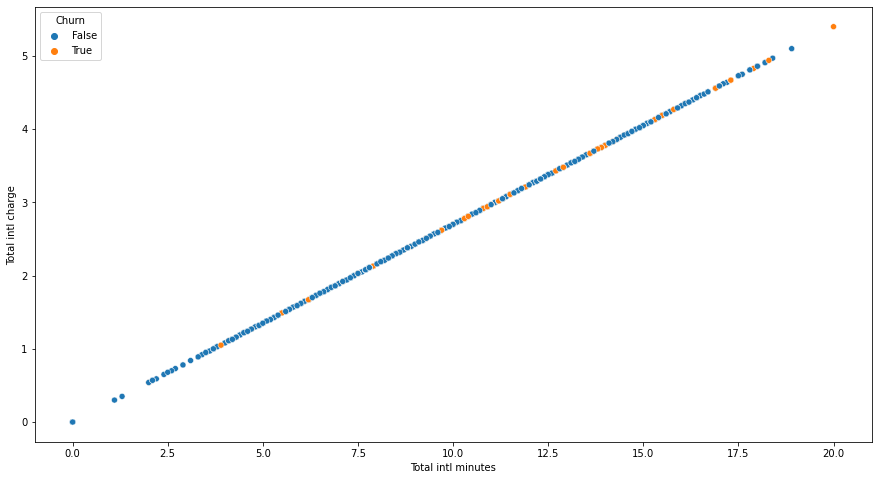

In [ ]:
#show the relation using scatter plot
sns.scatterplot(x="Total intl minutes", y="Total intl charge", hue="Churn", data=df)


In [ ]:
#Deriving a relation between overall call charge and overall call minutes   
day_charge_perm = df['Total day charge'].mean()/df['Total day minutes'].mean()
eve_charge_perm = df['Total eve charge'].mean()/df['Total eve minutes'].mean()
night_charge_perm = df['Total night charge'].mean()/df['Total night minutes'].mean()
int_charge_perm= df['Total intl charge'].mean()/df['Total intl minutes'].mean()


In [ ]:
print([day_charge_perm,eve_charge_perm,night_charge_perm,int_charge_perm])

[0.17000300739130672, 0.08500104871485778, 0.04500041448440008, 0.2700500279887107]


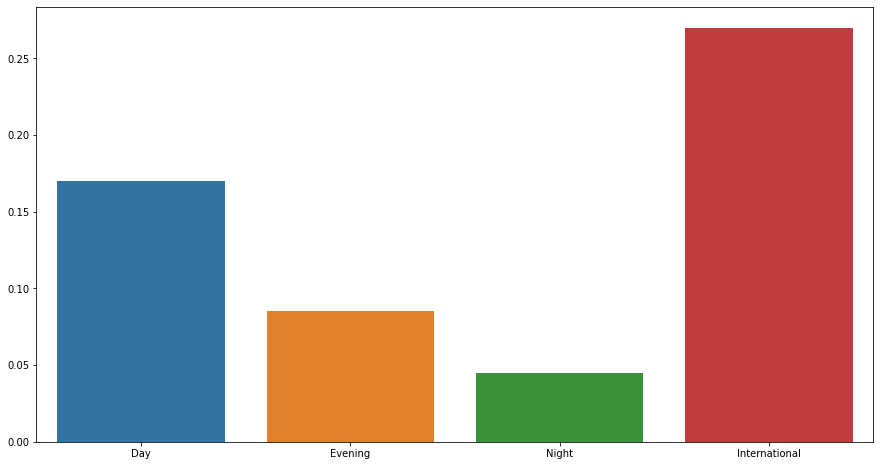

In [ ]:
sns.barplot(x=['Day','Evening','Night','International'],y=[day_charge_perm,eve_charge_perm,night_charge_perm,int_charge_perm])

# **ANALYSING THE CHURN**

In [ ]:
#printing the count of customer churned
churn_values=df['Churn'].value_counts()
churn_values
#483 customer churned and 2850 customer retained

False    2850
True      483
Name: Churn, dtype: int64

In [ ]:
#taking the percentage values of the churn rate
df['Churn'].value_counts()/df['Churn'].count()*100

False    85.508551
True     14.491449
Name: Churn, dtype: float64

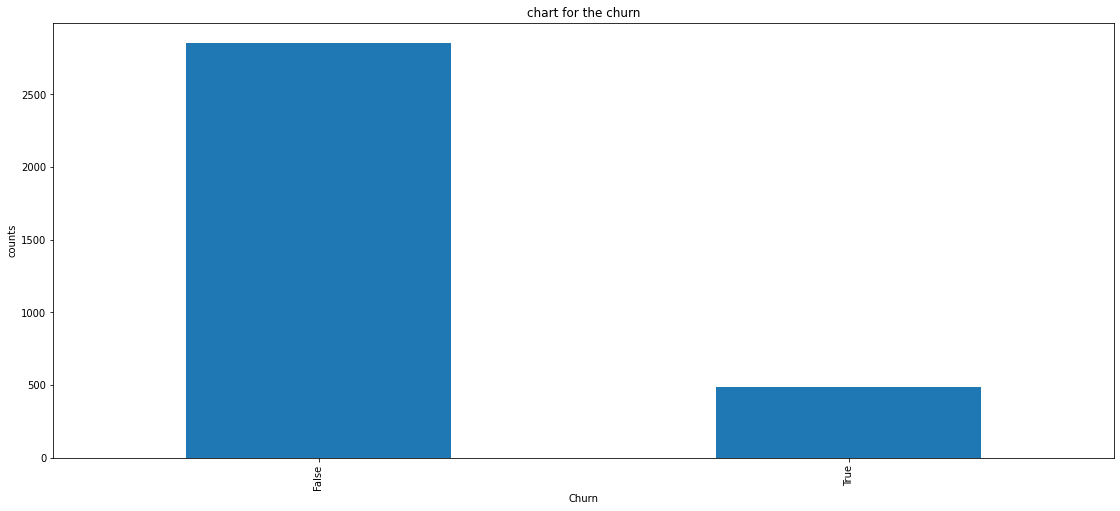

In [ ]:
#compare the values in visualization
churn_values.plot(kind='bar')
plt.title('chart for the churn')
plt.ylabel('counts')
plt.xlabel('Churn')
plt.rcParams['figure.figsize']=(19,8)

# checking the null  values

In [ ]:
#looking for the null values in eachh column
df.isnull().sum()
#there are no null values

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

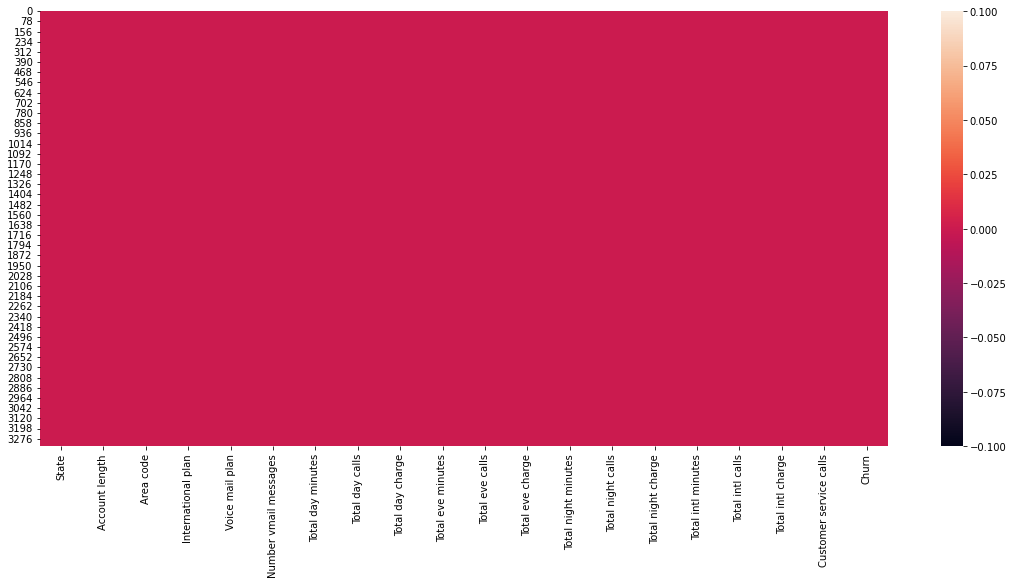

In [ ]:
#Visualising the null values using a heatmap
sns.heatmap(df.isnull())
#There are No Null values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'percentage')

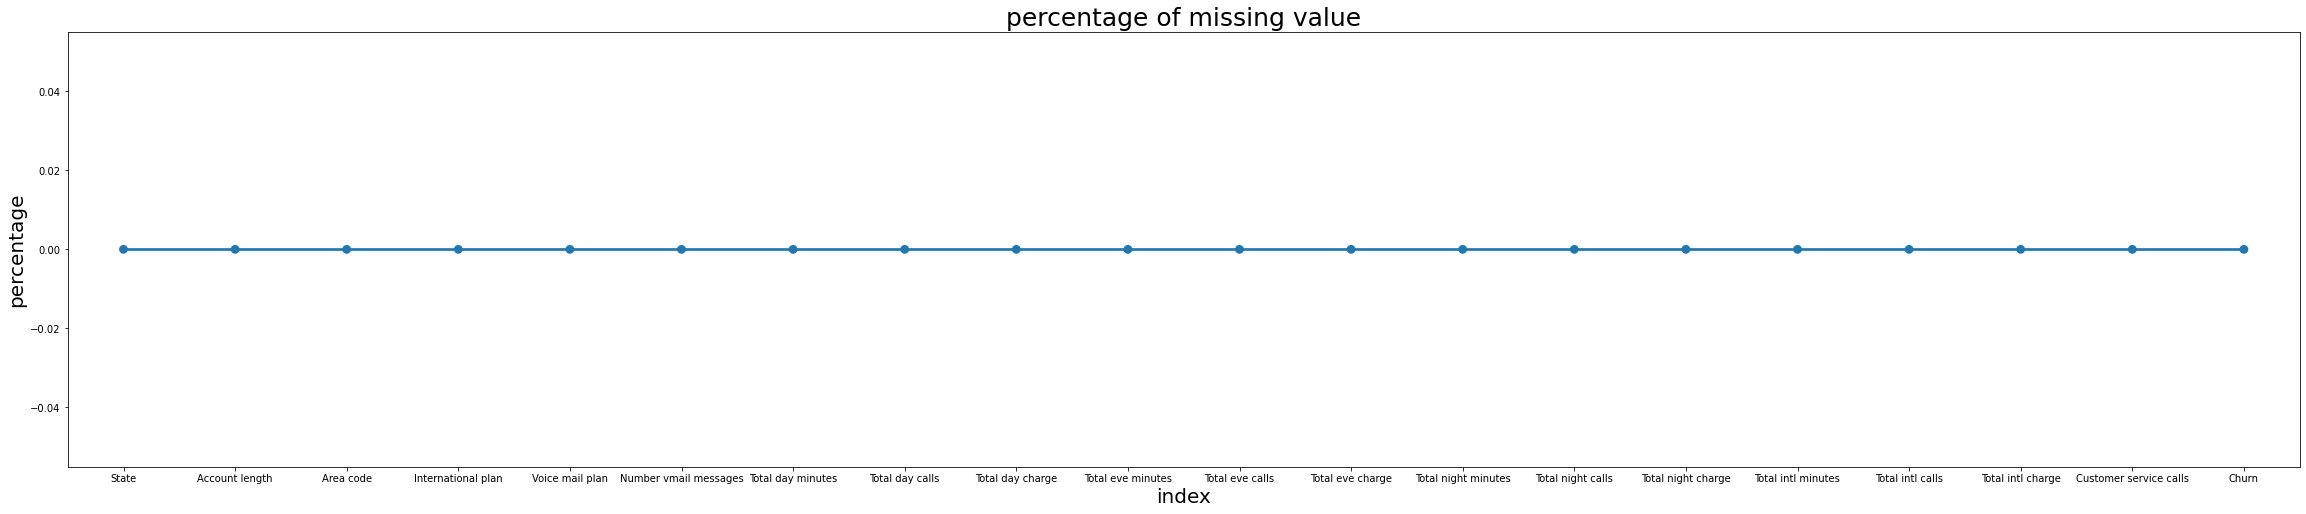

In [ ]:
#visualising the null values using a pointplot
null=pd.DataFrame((df.isna().sum())*100/df.shape[0]).reset_index()
sns.pointplot('index',0, data=null)
plt.rcParams['figure.figsize']=(40,8)
plt.title('percentage of missing value',fontsize=25)
plt.xlabel('index',fontsize=20)
plt.ylabel('percentage',fontsize=20)
#there are no null values

### Analyize State count

In [ ]:
#printing total number of unique values
df['State'].nunique()

51

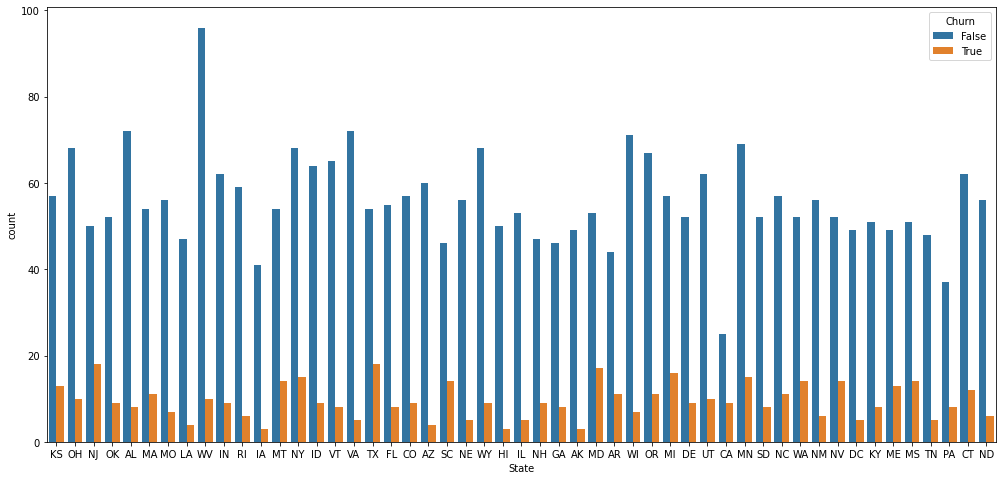

In [ ]:
#comparision churn with state 
plt.rcParams['figure.figsize']=(17,8)
sns.countplot(x='State',hue='Churn',data=df)

Text(0, 0.5, 'Churn rate')

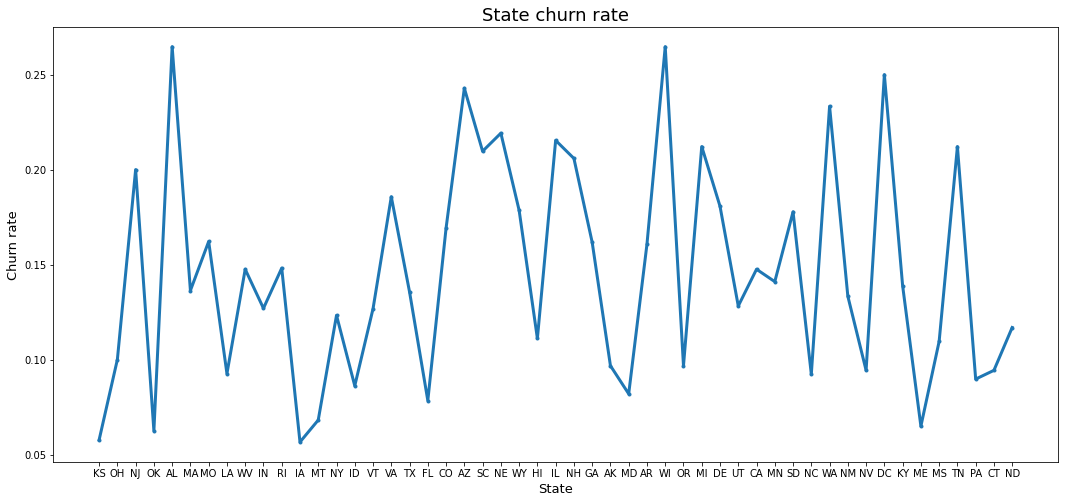

In [ ]:
state1=df['State'].unique()
state2=df.groupby('State')['Churn'].mean()

plt.rcParams['figure.figsize']=(18,8)

plt.plot(state1,state2,linewidth=3,marker='.')
plt.title('State churn rate',fontsize=18)
plt.xlabel('State',fontsize=13)
plt.ylabel('Churn rate',fontsize=13)

Text(0, 0.5, 'percentage')

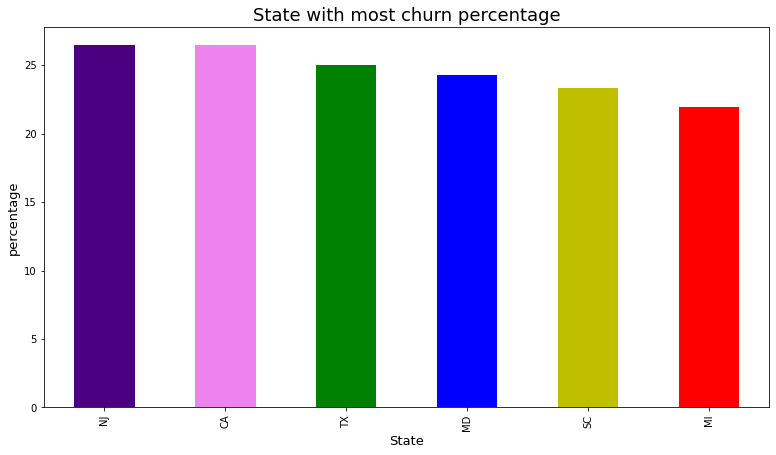

In [ ]:
plt.rcParams['figure.figsize']=(13,7)
color=plt.cm.copper(np.linspace(0,0.5,20))
((df.groupby('State')['Churn'].mean())*100).sort_values(ascending=False).head(6).plot.bar(color=['indigo','violet','g','b','y','r','orange'])
plt.title('State with most churn percentage',fontsize=18)
plt.xlabel('State',fontsize=13)
plt.ylabel('percentage',fontsize=13)

In [ ]:
#calculate the state vs churn percentage
State_data=pd.crosstab(df['State'],df['Churn'])
State_data['Percentage Churn']=State_data.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)
State_data

Churn,False,True,Percentage Churn
State,,,
AK,49,3,5.769231
AL,72,8,10.000000
AR,44,11,20.000000
AZ,60,4,6.250000
CA,25,9,26.470588
CO,57,9,13.636364
CT,62,12,16.216216
DC,49,5,9.259259
DE,52,9,14.754098


In [ ]:
#the most top 10 churn stae in descending order
df.groupby('State')['Churn'].mean().sort_values(ascending=False).head(10)


State
NJ    0.264706
CA    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
Name: Churn, dtype: float64

**there are 51 unique states having different  churn  rate**.

**from the  above analysis CA,NJ,TX,MD,SC,MI are theone with higher churnrate**

**The reason for this churn rate from a particular state may be due to the low coverage of the cellular network**








## Analyzing "Area Code" column

In [ ]:
#calculating the  area code  vs churn  percentage
Area_code=pd.crosstab(df["Area code"],df["Churn"])
Area_code["Percentage_Churn"]= Area_code.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)
Area_code

Churn,False,True,Percentage_Churn
Area code,,,
408,716,122,14.558473
415,1419,236,14.259819
510,715,125,14.880952


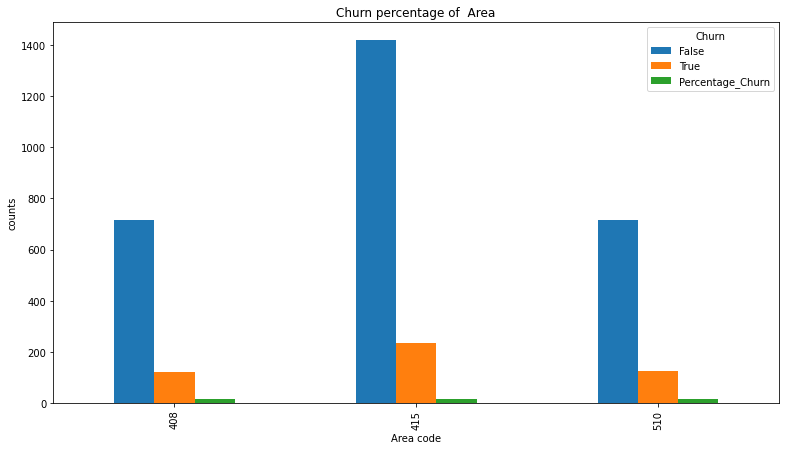

In [ ]:
Area_code.plot(kind='bar')
plt.title('Churn percentage of  Area')
plt.xlabel('Area code')
plt.ylabel('counts')
plt.show()


**In the  above data,we notice that there is only 3unique  values are there i.e.408,415,510 and the churn rate is almost same.**

**we don't think churn rate has any relation with 'Area code' due to which customer leaves the operator**




#Analyzing "Account Length" column

In [ ]:
#seperating churn and non churn customer
churn_df=df[df['Churn']==True]
non_churn_df=df[df['Churn']==False]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


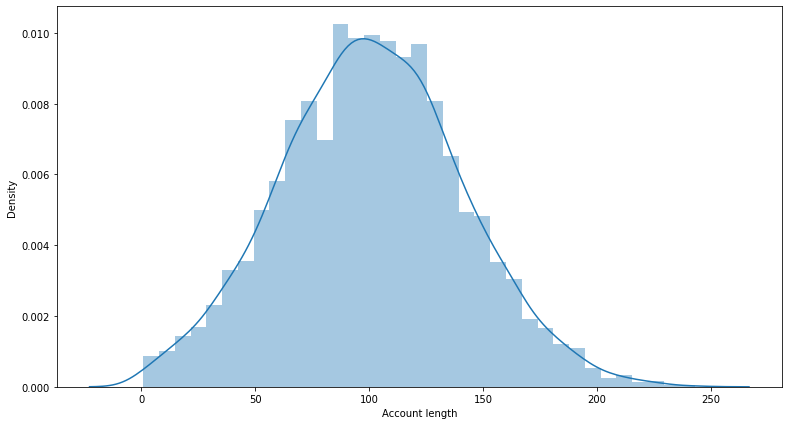

In [ ]:
#Account length vs Churn
sns.distplot(df['Account length'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level f

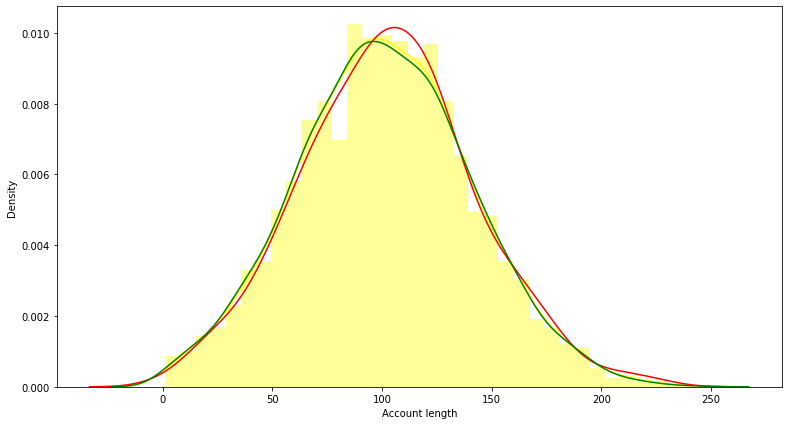

In [ ]:
#comparision of churned account and non churned account
sns.distplot(df['Account length'],color='yellow',label='All')
sns.distplot(churn_df['Account length'],color='red',hist=False,label='Churned')
sns.distplot(non_churn_df['Account length'],color='green',hist=False,label='Not Churned')

**After analyzing various aspects of the "Account length" column we didn't found any useful relation to churn.So we aren't able to build any connection to the churn as of now.Let's see what other features can relate to churn**

# Analyzing "International Plan" column

In [ ]:
#the output show in 'yes' or 'no'
df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

In [ ]:
#unique values of "International plan"
df['International plan'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
#calculate the International plan vs churn percentage
International_plan_data=pd.crosstab(df['International plan'],df['Churn'])
International_plan_data['Percentage Churn']=International_plan_data.apply(lambda x:x[1]*100/(x[0]+x[1]),axis=1)
International_plan_data

Churn,False,True,Percentage Churn
International plan,,,
No,2664,346,11.495017
Yes,186,137,42.414861


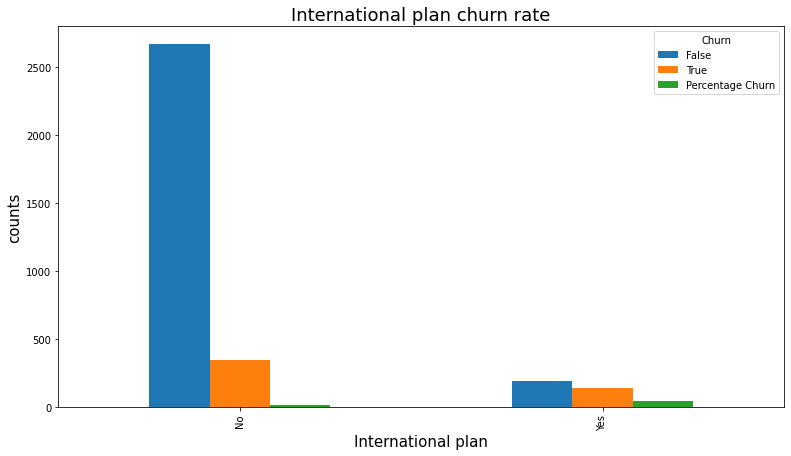

In [ ]:
International_plan_data.plot(kind='bar')
plt.title('International plan churn rate',fontsize=18)
plt.xlabel('International plan',fontsize=15)
plt.ylabel('counts',fontsize=15)
plt.show()



**from the above data we get**

**there are 3010 customers who don't have a international plan**

**there are 323 customers who have a international plan**
**Among these who have a international plan 42.4% people churn**


**Whereas among those who don't have a international plan only 11.4% people churn**


**So badically the people who bought international plan are churning in big scale**

**Probably because of connectivity issue of high cell charge**






# Analyzing "Voice Mail Plan" column

In [ ]:
#unique values of "voice mail plan"
df['Voice mail plan'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
#calculating the Voice mail plan vs churn percentage
voice_mail_plan=pd.crosstab(df['Voice mail plan'],df['Churn'])
voice_mail_plan['Percentage Churn']=voice_mail_plan.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)
voice_mail_plan

Churn,False,True,Percentage Churn
Voice mail plan,,,
No,2008,403,16.715056
Yes,842,80,8.676790


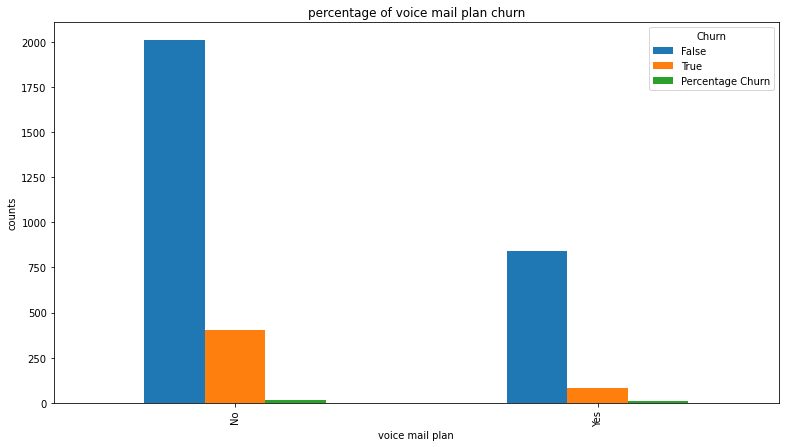

In [ ]:
voice_mail_plan.plot(kind='bar')
plt.title('percentage of voice mail plan churn')
plt.xlabel('voice mail plan')
plt.ylabel('counts')
plt.show()

**As we can see there is no clear relation between voice mail plan and churn so we can't clearly say anything so let's move to the next voice mail feature i.i. number of voice mail**

In [ ]:
#unique values of "Number vmail messages"
df["Number vmail messages"].unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9])

In [ ]:
#printing the values of "Number vmail messages"
df['Number vmail messages'].value_counts()

0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
22      32
35      32
39      30
34      29
37      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
16      13
41      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
50       2
9        2
8        2
11       2
48       2
49       1
4        1
10       1
51       1
Name: Number vmail messages, dtype: int64

In [ ]:
#lets explore the description of data
df['Number vmail messages'].describe()

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: Number vmail messages, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


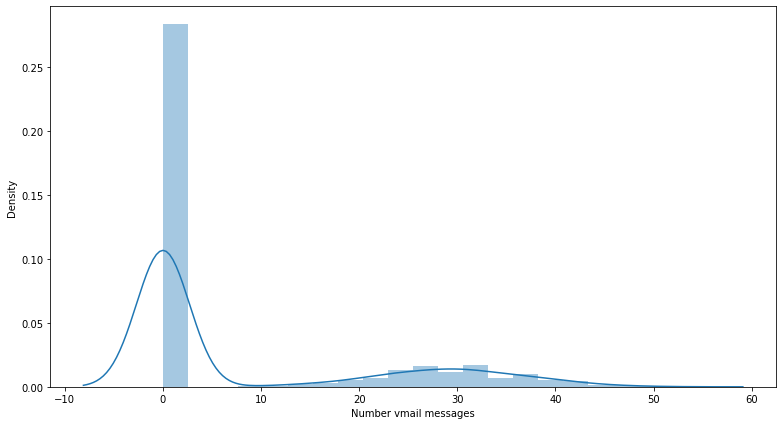

In [ ]:
sns.distplot(df['Number vmail messages'])

Text(0, 0.5, 'density')

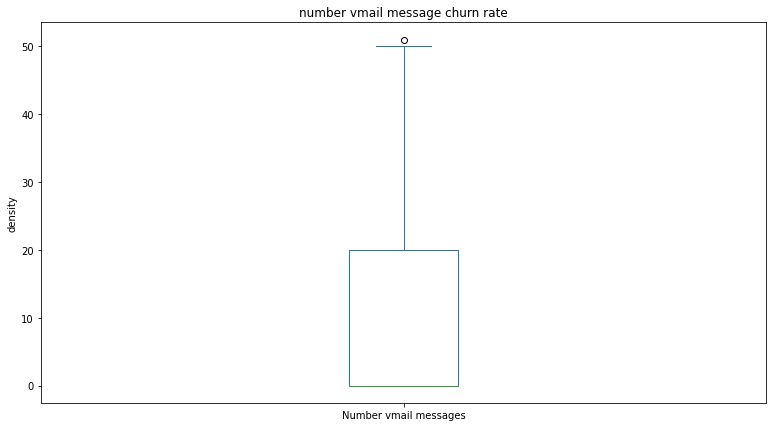

In [ ]:
df["Number vmail messages"].plot(kind='box')
plt.title('number vmail message churn rate')

plt.ylabel('density')

**After analyzing the above voice mail feature data we get an insight that when there are more than 20 voice mail messages then there is a churn for that,we need to improve voice mail quality**

# Analyzing "Customer service calls" columns

In [ ]:
#printing the data of customer service calls
df['Customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

In [ ]:
#calculating the Customer service calls vs Churn percentage
customer_service_call=pd.crosstab(df['Customer service calls'],df['Churn'])
customer_service_call['Percentage Churn']=customer_service_call.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)
customer_service_call

Churn,False,True,Percentage Churn
Customer service calls,,,
0,605,92,13.199426
1,1059,122,10.330229
2,672,87,11.462451
3,385,44,10.256410
4,90,76,45.783133
5,26,40,60.606061
6,8,14,63.636364
7,4,5,55.555556
8,1,1,50.000000


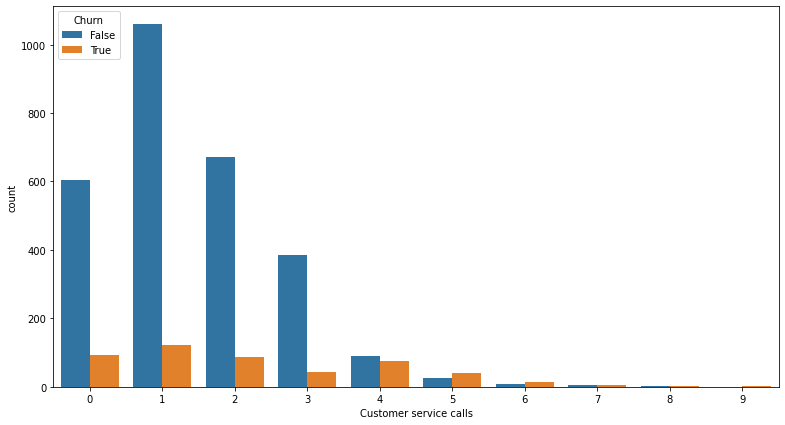

In [ ]:
sns.countplot(x='Customer service calls',hue='Churn',data=df)

**It is observed from the abbove analysis that,mostly because of bad customer service,people tend to live the operator.
THE above data indicating that those customer who called the service centre 5 times or above those customer churn percenttage is higher than60%. And customers who have ccalled once also have a high churn rate indicating their issue was not solved in first attempt.
SO operator shoild work to improve service calls.**

# **CONCLUSION:**

**After performing exploratory data analysis on the data set,the following conclusion we can provide:**


* **There are some states where the churn rate is high as compared to other maybe due to network coverage**
* **Area code and Account length do not play any kind of role regarding the churn rate**

* **In the International plan those customer who have this plan churned more and also the International calling charges are also high so the customer who has the plan unsatisfied with network issue and high cell charge**
* **IN the voice mail section when there are more than 20 voice mail messages then there  is a churn so it basically means that the quality of voice mail is not good**

* **Total day call minutes,total day calls,total day charge,total eve charge,total eve calls,total eve minutes,total night charge,total night calls,total night minutes did not play any kind of role regarding the churn rate**
* **In International calls data shows that the churn rate of those customer is high,who takes the international plan thus,it means that in international call charges are high also there is a call drop or network issue**

* **In the Customer service calls data shows us that whenever an unsatisfied customer called the service center the churn rate is high,which means the service centre didn't resolve the customer service**

















# **RECOMMENDATIONS:**

* **improve network coverage churned state**
* **In International  plan provide some discount plan to the customer**

* **Improve the voice mail quality or take feedback from the customer**
* **Improve the service call centre and take the frequent feedback from the customer regarding their issue and try to solve it as soon as possible**



